In [1]:
import pandas as pd
import numpy as np

import os
%config Completer.use_jedi = False # jupyter autocomplete
import seaborn as sns

## setting directory and reading df

In [2]:

# Setting directory
os.chdir('/home/rahul/Documents/Personal/Python_practice')

#Get directory
os.getcwd()

'/home/rahul/Documents/Personal/Python_practice'

In [3]:
df= pd.read_csv('police.csv')
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df[df['driver_gender'].isnull()]

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
25,2005-09-03,16:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
29,2005-09-26,01:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52,2005-10-01,13:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
110,2005-10-03,19:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
124,2005-10-04,11:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91637,2015-12-27,09:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
91660,2015-12-28,02:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
91674,2015-12-28,12:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
91710,2015-12-30,13:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [6]:
# 
df.shape

(91741, 15)

In [7]:
# checking missing values
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [8]:
# dropping specific column
df.drop('county_name',axis=1,inplace=True)
# column name
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [9]:
# Summary of data
df.describe()

,driver_age_raw,driver_age
count,86414.000000,86120.000000
mean,1970.491228,34.011333
std,110.914909,12.738564
min,0.000000,15.000000
25%,1967.000000,23.000000
50%,1980.000000,31.000000
75%,1987.000000,43.000000
max,8801.000000,99.000000


## date time converting 

- pd.to_datetime()

In [10]:
# fixing date time
df['stop_date']=pd.to_datetime(df['stop_date'])

# converting to Hours and minutes
df['stop_time']=pd.to_datetime(df['stop_time'],format='%H:%M').dt.time

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  object        
 2   driver_gender       86406 non-null  object        
 3   driver_age_raw      86414 non-null  float64       
 4   driver_age          86120 non-null  float64       
 5   driver_race         86408 non-null  object        
 6   violation_raw       86408 non-null  object        
 7   violation           86408 non-null  object        
 8   search_conducted    91741 non-null  bool          
 9   search_type         3196 non-null   object        
 10  stop_outcome        86408 non-null  object        
 11  is_arrested         86408 non-null  object        
 12  stop_duration       86408 non-null  object        
 13  drugs_related_stop  91741 non-null  bool      

## value_counts()
- “value_counts()” function is used to identify the different categories in a feature as well as the count of values per category.

In [12]:
#
df['search_type'].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [13]:
# No of people arresetd
df['is_arrested'].value_counts()

False    83479
True      2929
Name: is_arrested, dtype: int64

In [14]:
df.groupby('is_arrested').agg({'is_arrested':'count'}).rename(columns={'is_arrested':'no_of_arrested'})

,no_of_arrested
is_arrested,
False,83479
True,2929


## Missing value imputation

- **fillna()**

In [15]:
# fiiling missing value
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [16]:
df['driver_gender'].value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [17]:
df['driver_gender'].mode().iloc[0]

'M'

In [18]:
# filling missing value with mode
df['driver_gender'].fillna(df['driver_gender'].mode()[0], inplace=True)


In [19]:
df['driver_gender'].value_counts()

M    68230
F    23511
Name: driver_gender, dtype: int64

In [20]:
df['driver_gender'].isnull().sum()

0

In [21]:
#df['price'].fillna(df.groupby('fruit')['price'].transform('mean'), inplace = True)

#df['driver_age_raw'].fillna(groupby('driver_gender')['driver_age_raw'].transform('mean'))

In [22]:
round(df['driver_age_raw'][df['driver_gender']=='F'].mean(),0).astype(int)

1975

In [23]:
# Raw age 
df['driver_age_raw']=np.where(df['driver_age_raw'].isnull(),round(df['driver_age_raw'][df['driver_gender']=='F'].mean(),0).astype(int),df['driver_age_raw'])
df['driver_age_raw']=np.where(df['driver_age_raw'].isnull(),round(df['driver_age_raw'][df['driver_gender']=='M'].mean(),0).astype(int),df['driver_age_raw'])

#Age 

df['driver_age']=np.where(df['driver_age'].isnull(),round(df['driver_age'][df['driver_gender']=='F'].mean(),0).astype(int),df['driver_age'])
df['driver_age']=np.where(df['driver_age'].isnull(),round(df['driver_age'][df['driver_gender']=='M'].mean(),0).astype(int),df['driver_age'])

df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            0
driver_age                0
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [24]:
df.shape

(91741, 14)

# Outlier Removal

In [25]:
def outliersRemoval(col):
    sorted(col) #first sort the data
    q1,q3= col.quantile([0.25,0.75]) # finding q1 and q3
    iqr=q3-q1   # IQR finding
    lb= q1-1.5*(iqr)  # More than Max value
    ub= q3+1.5*(iqr) # Less then min value
    return lb,ub

In [26]:
lb,ub=outliersRemoval(df['driver_age'])
lb,ub

(-3.0, 69.0)

In [27]:
# Now finding the value greater than ub and lower than lb
np.where(df['driver_age']>ub,ub,df['driver_age'])
np.where(df['driver_age']<lb,lb,df['driver_age'])

array([20., 40., 33., ..., 23., 22., 56.])

<AxesSubplot: >

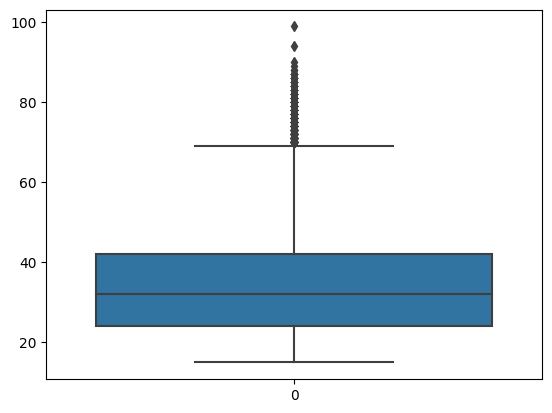

In [28]:
sns.boxplot(df.driver_age)

## sample()
- We can use the “sample()” function which allows us to choose random values from our data frame. We can pass it the no. of rows that we want to fetch as a parameter.

In [29]:
df.sample(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
37976,2009-10-21,17:30:00,M,1975.0,33.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
35495,2009-06-16,07:50:00,M,1975.0,33.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
51886,2011-08-23,02:16:00,F,1989.0,22.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
34869,2009-05-21,23:20:00,M,1954.0,55.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
36350,2009-07-24,08:00:00,M,1969.0,40.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## nunique()
- We can use the “nunique()” function to find the no. of unique values in our series or data frame. Generally, it is used in the case of categorical features to identify the no. of categories in a particular feature.

In [30]:
df['driver_race'].nunique()

5

## nsmallest() & nlargest()
- So, as the name suggests, “nsmallest() & nlargest()” functions are used to obtain “n” no. of rows from our dataset which are lowest or highest respectively.

In [31]:
df['driver_age'].nsmallest(4)

10500    15.0
17771    15.0
18357    15.0
25294    15.0
Name: driver_age, dtype: float64

In [32]:
df.nsmallest(4,'driver_age')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
10500,2006-09-30,01:30:00,M,1991.0,15.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False
17771,2007-06-11,12:30:00,M,1992.0,15.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
18357,2007-07-04,00:40:00,F,1992.0,15.0,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False
25294,2008-04-21,11:19:00,M,1993.0,15.0,Hispanic,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False


In [33]:
df['driver_age'].nlargest(1)

71539    99.0
Name: driver_age, dtype: float64

In [34]:
df.nlargest(4,'driver_age')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
71539,2013-09-08,09:50:00,F,1914.0,99.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False
75037,2014-02-14,10:21:00,M,1920.0,94.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
76956,2014-04-25,16:40:00,M,1924.0,90.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
74348,2014-01-18,13:07:00,F,1925.0,89.0,White,Equipment/Inspection Violation,Equipment,False,NaN,N/D,False,0-15 Min,False


<AxesSubplot: xlabel='driver_age', ylabel='Count'>

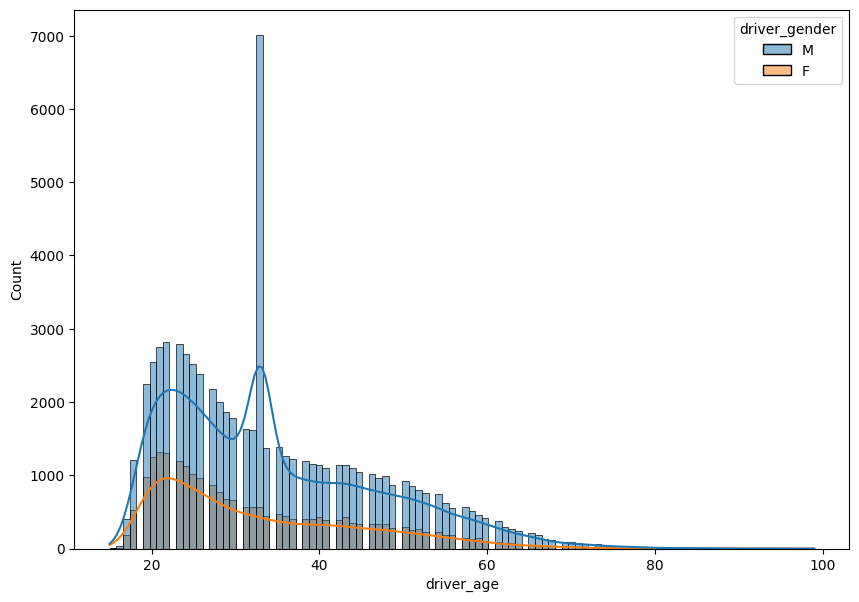

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(10,7))
sns.histplot(x='driver_age',data=df,kde=True,hue='driver_gender')

<AxesSubplot: >

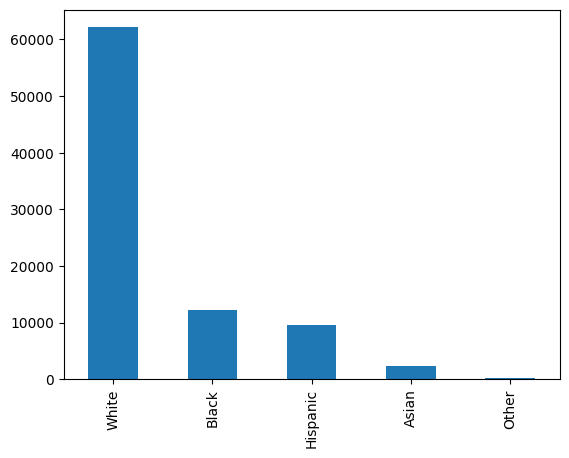

In [36]:
df['driver_race'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='driver_race', ylabel='count'>

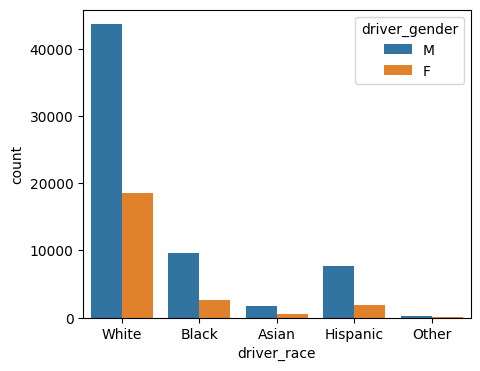

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(x='driver_race',data=df,hue='driver_gender')

<AxesSubplot: xlabel='is_arrested', ylabel='count'>

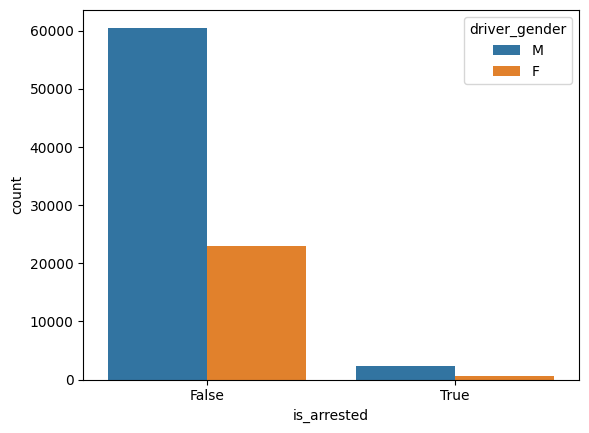

In [38]:
sns.countplot(x='is_arrested',data=df,hue='driver_gender')

<AxesSubplot: xlabel='driver_race', ylabel='count'>

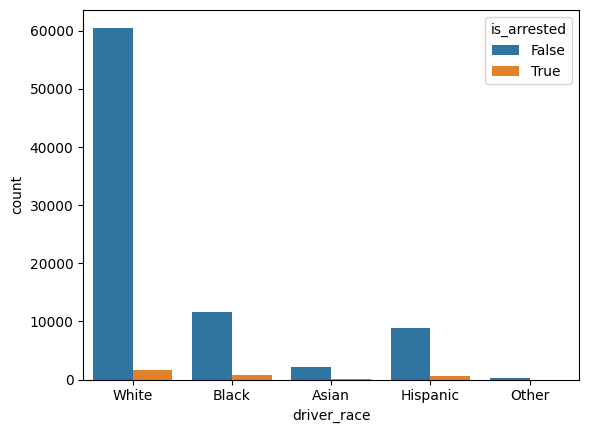

In [39]:
sns.countplot(x='driver_race',data=df,hue='is_arrested')

In [40]:
#

df['is_arrested'].value_counts()

False    83479
True      2929
Name: is_arrested, dtype: int64

In [41]:
arrested_count=df['driver_race'][df['is_arrested']==True].value_counts()

In [42]:
Total=df['driver_race'].value_counts()


In [43]:
per_arrested_cnt=(arrested_count/Total)*100

In [44]:
per_arrested_cnt

White       2.598217
Black       5.757922
Hispanic    5.953508
Asian       1.814962
Other       0.833333
Name: driver_race, dtype: float64

In [45]:
df.shape

(91741, 14)

## groupby()
- The “groupby()” function is very useful in data analysis as it allows us to unveil the underlying relationships among different variables. And then we can apply Aggregations as well on the groups with the “agg()” function and pass it with various aggregation operations such as mean, size, sum, std etc.

In [46]:
df.groupby('driver_race').agg(np.mean)

/tmp/ipykernel_49604/2213741359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('driver_race').agg(np.mean)


,driver_age_raw,driver_age,search_conducted,drugs_related_stop
driver_race,,,,
Asian,1971.271802,33.578132,0.022576,0.004869
Black,1970.870549,33.110095,0.064521,0.016416
Hispanic,1974.886084,31.569896,0.061428,0.013253
Other,1967.025000,34.541667,0.012500,0.004167
White,1969.792239,34.571656,0.028444,0.007658


## get_group()
- We can use the “get_group()” function to select a specific group.

In [47]:
df.groupby('driver_race').get_group('Asian')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
10,2005-07-13,16:20:00,M,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
20,2005-07-28,12:37:00,F,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
37,2005-09-30,14:00:00,M,1962.0,43.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
67,2005-10-01,23:25:00,M,1974.0,31.0,Asian,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
96,2005-10-03,02:20:00,F,1950.0,55.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91502,2015-12-18,20:18:00,M,1988.0,27.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91510,2015-12-18,23:37:00,M,1993.0,22.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91539,2015-12-20,09:27:00,M,1962.0,53.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91612,2015-12-26,09:07:00,M,1942.0,73.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [48]:
df['violation'].value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

## loc() and iloc()
- loc() and iloc() methods are used in slicing data from the pandas DataFrame which helps in filtering the data according to some given condition.
- loc :select by labels
- iloc : select by positions ---- Index

In [49]:
#if i want to select first 5 Rows and and two columns

df.loc[:5,['driver_age','violation']]

,driver_age,violation
0,20.0,Speeding
1,40.0,Speeding
2,33.0,Speeding
3,19.0,Other
4,21.0,Speeding
5,23.0,Equipment


In [50]:
# FInd the record wher eage is less than 16 and violation is speeding

df.loc[(df['driver_age']<16) & (df['violation']=='Speeding')]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
17771,2007-06-11,12:30:00,M,1992.0,15.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### iloc() slices the data frame in the specified rows and column range.

In [51]:
# If i want only first 5 rows and first 5 columns
df.iloc[:5,:5]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age
0,2005-01-02,01:55:00,M,1985.0,20.0
1,2005-01-18,08:15:00,M,1965.0,40.0
2,2005-01-23,23:15:00,M,1972.0,33.0
3,2005-02-20,17:15:00,M,1986.0,19.0
4,2005-03-14,10:00:00,F,1984.0,21.0


## Sorting
- We can sort our DataFrame by index or values with Pandas “sort_index()” and “sort_values()” functions. Below is the implementation for sort by values:

In [52]:
# Sort values by driver age and i want to see specific column not all columns
df[['stop_date','driver_age','driver_race','violation','is_arrested']].sort_values(by='driver_age')

,stop_date,driver_age,driver_race,violation,is_arrested
18357,2007-07-04,15.0,White,Moving violation,True
17771,2007-06-11,15.0,White,Speeding,False
25294,2008-04-21,15.0,Hispanic,Moving violation,True
45988,2010-11-10,15.0,White,Moving violation,False
10500,2006-09-30,15.0,Black,Moving violation,True
...,...,...,...,...,...
9829,2006-09-06,88.0,White,Speeding,False
74348,2014-01-18,89.0,White,Equipment,False
76956,2014-04-25,90.0,White,Speeding,False
75037,2014-02-14,94.0,White,Moving violation,False


## Query
- We can use the Pandas query() function to filter our data frame as per our conditions or requirements as shown below

In [53]:
# find the driver age greater than 45 and less than 50
df.query('45<driver_age<50').head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
19,2005-07-24,20:10:00,F,1958.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
30,2005-09-26,12:09:00,M,1959.0,46.0,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,30+ Min,False
46,2005-10-01,08:40:00,M,1959.0,46.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
48,2005-10-01,09:20:00,M,1957.0,48.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
57,2005-10-01,18:10:00,M,1958.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [54]:
# Filter only Male data
df.query('driver_gender=="M"').head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
5,2005-03-23,09:45:00,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False


In [55]:
df[df['driver_gender']=="M"].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
5,2005-03-23,09:45:00,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False


In [56]:
df.shape

(91741, 14)

## set_index()
- So, we can use Pandas “set_index()” function to set any of your columns as the index.

In [57]:
df.set_index('stop_date').head()

,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_date,,,,,,,,,,,,,
2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## duplicated()
- We can use the “duplicated()” function to find all the duplicate rows in our dataset. And, then we can remove duplicate values using the drop_duplicates() function, as having too many duplicate values will affect the accuracy of our model at the later stage.

In [58]:
df['stop_date'].duplicated().sum()

87973

In [59]:
# FInding the no of repeated date on stop_date
df.groupby('stop_date').agg({'stop_date':'count'}).rename(columns={'stop_date':'count'}).sort_values(by='count',ascending=False).head()

,count
stop_date,
2012-01-11,69
2012-02-28,65
2007-05-16,62
2012-01-02,61
2007-01-10,60


### Dropping the duplicate value and keeping only first value from duplicated

In [60]:

df_new=df.drop_duplicates('stop_date',keep='first')

In [61]:
df.shape,df_new.shape

((91741, 14), (3768, 14))

In [62]:
df.query('stop_date=="2012-01-11"').head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
55438,2012-01-11,00:02:00,M,1986.0,26.0,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,16-30 Min,False


In [63]:
df_new.query('stop_date=="2012-01-11"')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
55438,2012-01-11,00:02:00,M,1986.0,26.0,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,16-30 Min,False


## pd.get_dummies()
- Pandas “get_dummies()” method is used to convert the categorical features of the data into dummy variables or indicator variables.

In [64]:
pd.get_dummies(df['driver_race'],prefix='driver_race',drop_first=True).head()

,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


## select_dtypes()
- We can separate the numerical and categorical features from our data frame and create new ones by using the “select_dtypes()” function and include “np.number” to select numerical columns whereas include “objects” for categorical columns.



In [65]:
# Numerical data
numerical_data=df.select_dtypes(include=[np.number]) 
numerical_data.head()

,driver_age_raw,driver_age
0,1985.0,20.0
1,1965.0,40.0
2,1972.0,33.0
3,1986.0,19.0
4,1984.0,21.0


In [66]:
# Str data
object_data=df.select_dtypes(include='object')
object_data.head()

,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration
0,01:55:00,M,White,Speeding,Speeding,NaN,Citation,False,0-15 Min
1,08:15:00,M,White,Speeding,Speeding,NaN,Citation,False,0-15 Min
2,23:15:00,M,White,Speeding,Speeding,NaN,Citation,False,0-15 Min
3,17:15:00,M,White,Call for Service,Other,NaN,Arrest Driver,True,16-30 Min
4,10:00:00,F,White,Speeding,Speeding,NaN,Citation,False,0-15 Min


## concat()
- We can perform concatenation of pandas object into a DataFrame output along a particular axis with optional set logic such as union and intersection using concat() method.

By default, axis=0, i.e. row-wise concatenation, so if we set axis=1, column-wise concatenation will be performed.

In [67]:
comb_df= pd.concat([numerical_data,object_data],axis=1)
comb_df.head()

,driver_age_raw,driver_age,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration
0,1985.0,20.0,01:55:00,M,White,Speeding,Speeding,NaN,Citation,False,0-15 Min
1,1965.0,40.0,08:15:00,M,White,Speeding,Speeding,NaN,Citation,False,0-15 Min
2,1972.0,33.0,23:15:00,M,White,Speeding,Speeding,NaN,Citation,False,0-15 Min
3,1986.0,19.0,17:15:00,M,White,Call for Service,Other,NaN,Arrest Driver,True,16-30 Min
4,1984.0,21.0,10:00:00,F,White,Speeding,Speeding,NaN,Citation,False,0-15 Min


In [68]:
col=list(comb_df.columns)
col

['driver_age_raw',
 'driver_age',
 'stop_time',
 'driver_gender',
 'driver_race',
 'violation_raw',
 'violation',
 'search_type',
 'stop_outcome',
 'is_arrested',
 'stop_duration']

In [69]:
df.columns[~df.columns.isin (col)]

Index(['stop_date', 'search_conducted', 'drugs_related_stop'], dtype='object')

## apply()
- Suppose we create our own custom function and we want to use that function in our data frame. This is where the Pandas “apply()” function comes into play. It allows us to apply a custom function to every element of a particular Series.

So, here we have created our own custom function currentAge() which returns the current age of the person by subtracting their date of birth from the current year(2021). And, after that we can use this function inside the “apply()” function.

In [70]:
def current_age(dob):
    return(2023-dob)

In [71]:
df['driver_current_age']=df['driver_age_raw'].apply(current_age)
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_current_age
0,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,38.0
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,58.0
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,51.0
3,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,37.0
4,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,39.0


## pd.qcut() and pd.cut()
- So, when we have to deal with continuous numeric data, it is often helpful to bin them into multiple buckets and then carry on with the further analysis of the data. Pandas provide two methods which are qcut() and cut(), which helps us to convert continuous data to a set of discrete buckets.

  - qcut() method ensures a more even distribution of the values inside each bin, so we can say it’s a better sampling. We just pass the no. of bins and then Pandas does the behind the scene job to decide how wide to make each bin.

  - cut() method is used to specifically define the bin edges and hence the distribution of values is not even across all the bins. There might be a situation when there is no item inside a particular bin, so we should be careful about that.

In [72]:
pd.qcut(df['driver_current_age'],q=5)

0             (35.0, 41.0]
1             (48.0, 58.0]
2             (48.0, 58.0]
3             (35.0, 41.0]
4             (35.0, 41.0]
               ...        
91736         (35.0, 41.0]
91737         (35.0, 41.0]
91738    (-6778.001, 35.0]
91739    (-6778.001, 35.0]
91740       (58.0, 2023.0]
Name: driver_current_age, Length: 91741, dtype: category
Categories (5, interval[float64, right]): [(-6778.001, 35.0] < (35.0, 41.0] < (41.0, 48.0] < (48.0, 58.0] < (58.0, 2023.0]]

In [73]:
df.query('driver_current_age<0')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_current_age
17964,2007-06-17,09:55:00,M,8801.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,-6778.0
37779,2009-10-10,08:23:00,F,2919.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,-896.0


In [74]:
df[df['driver_current_age']<0].index

Int64Index([17964, 37779], dtype='int64')

In [75]:
# Removing negative age
df.drop(df[df['driver_current_age']<0].index,inplace=True)

#age >100 will be 100
df['driver_current_age']=np.where(df['driver_current_age']>100,100,df['driver_current_age'])

### pd.qcut

In [76]:
df['driver_current_age_qcut']=pd.qcut(df['driver_current_age'],q=5)
df['driver_current_age_qcut'].value_counts()

(41.0, 48.0]     20262
(35.0, 41.0]     19595
(9.999, 35.0]    18689
(58.0, 100.0]    17992
(48.0, 58.0]     15201
Name: driver_current_age_qcut, dtype: int64

In [77]:
df['driver_current_age'].min(),df['driver_current_age'].max()

(10.0, 100.0)

### pd.cut

In [78]:
df['driver_current_age_cut']=pd.cut(df['driver_current_age'],bins=3,labels=['0-18','19-60','60-100'])
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_current_age,driver_current_age_qcut,driver_current_age_cut
0,2005-01-02,01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,38.0,"(35.0, 41.0]",0-18
1,2005-01-18,08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,58.0,"(48.0, 58.0]",19-60
2,2005-01-23,23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,51.0,"(48.0, 58.0]",19-60
3,2005-02-20,17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,37.0,"(35.0, 41.0]",0-18
4,2005-03-14,10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,39.0,"(35.0, 41.0]",0-18


In [79]:
# 
df['driver_age'].value_counts()

33.0    7575
22.0    4125
21.0    4063
23.0    3986
20.0    3794
        ... 
88.0       2
99.0       1
89.0       1
94.0       1
90.0       1
Name: driver_age, Length: 78, dtype: int64